# Project: Wrangling and Analyze Data

## Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [306]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests
import tweepy 
import json 

from tweepy import OAuthHandler
from timeit import default_timer as timer

%matplotlib inline

In [307]:
dogs_master = pd.read_csv('twitter-archive-enhanced.csv')
dogs_master.head(2)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None


2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [308]:
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
image_request = requests.get(url, allow_redirects=True)

open('image_predictions.tsv', 'wb').write(image_request.content)

335079

In [309]:
image_predictions_df = pd.read_csv('image_predictions.tsv', sep = '\t')
#image_predictions_df.head()

3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [310]:
#consumer_key = ''
#consumer_secret = ''
#bearer_token = ''
#secret_token = ''

#auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
#auth.set_access_token(bearer_token, secret_token)

#api = tweepy.API(auth)

In [311]:
#with open('tweet_json.txt', 'w', encoding='utf8') as f:
#    for tweet_id in dogs_master['tweet_id']:
#        try:
#            tweet = api.get_status(tweet_id, tweet_mode='extended')
#            json.dump(tweet._json, f)
#            f.write('\n')
#        except:
#            continue

In [312]:
#for loop to get more interesting info
dogs_master_API = []

#This for loop will pull the info I'm interested in off the top of my head. I probably won't use all of it.
for line in open('tweet_json.txt', 'r'):
    jason_data = json.loads(line)
    dogs_master_API.append(
        {'tweet_id': jason_data['id_str'],
        'retweet_count': jason_data['retweet_count'],
        'tweet_date': jason_data['created_at'],
        'favorite_count': jason_data['favorite_count'], 
        'followers_count': jason_data['user']['followers_count']})

In [313]:
#check that it worked
dogs_master_API[:2]

[{'tweet_id': '892420643555336193',
  'retweet_count': 6990,
  'tweet_date': 'Tue Aug 01 16:23:56 +0000 2017',
  'favorite_count': 33778,
  'followers_count': 9314899},
 {'tweet_id': '892177421306343426',
  'retweet_count': 5293,
  'tweet_date': 'Tue Aug 01 00:17:27 +0000 2017',
  'favorite_count': 29292,
  'followers_count': 9314899}]

In [314]:
#convert to DF
dogs_master_API_df = pd.DataFrame(dogs_master_API)
#dogs_master_API_df.head()

## Assessing Data
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment
programmatic assessement to assess the data.

**Note:** pay attention to the following key points when you access the data.

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.



### Looking at dogs_master

In [315]:
dogs_master.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [316]:
dogs_master.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

Just right out of the gate we can see there's issues like unnecessary columns, and I know I'm going to want to get rid of retweets. Some of these datatypes will also need to change.

In [317]:
#dogs_master.rating_numerator.value_counts()
dogs_master.rating_denominator.value_counts()

10     2333
11        3
50        3
20        2
80        2
70        1
7         1
15        1
150       1
170       1
0         1
90        1
40        1
130       1
110       1
16        1
120       1
2         1
Name: rating_denominator, dtype: int64

In [318]:
#dogs_master.loc[dogs_master.rating_denominator == 110, 'text'] #1635
dogs_master['text'][1635]

#I was checking to see if some of those crazy numbers were in error but they're not

'Someone help the girl is being mugged. Several are distracting her while two steal her shoes. Clever puppers 121/110 https://t.co/1zfnTJLt55'

In [319]:
denoms = dogs_master.rating_denominator
print(dogs_master['text'][denoms != 10])

313     @jonnysun @Lin_Manuel ok jomny I know you're e...
342              @docmisterio account started on 11/15/15
433     The floofs have been released I repeat the flo...
516     Meet Sam. She smiles 24/7 &amp; secretly aspir...
784     RT @dog_rates: After so many requests, this is...
902     Why does this never happen at my front door......
1068    After so many requests, this is Bretagne. She ...
1120    Say hello to this unbelievably well behaved sq...
1165    Happy 4/20 from the squad! 13/10 for all https...
1202    This is Bluebert. He just saw that both #Final...
1228    Happy Saturday here's 9 puppers on a bench. 99...
1254    Here's a brigade of puppers. All look very pre...
1274    From left to right:\nCletus, Jerome, Alejandro...
1351    Here is a whole flock of puppers.  60/50 I'll ...
1433    Happy Wednesday here's a bucket of pups. 44/40...
1598    Yes I do realize a rating of 4/20 would've bee...
1634    Two sneaky puppers were not initially seen, mo...
1635    Someon

I was checking to see if any of those big numbers were a mistake, but we can see there's things like 144/120 or 121/110 as a rating for groups of dogs, which is a joke, so I will leave it. 

In [320]:
dogs_master.name.value_counts()

None          745
a              55
Charlie        12
Cooper         11
Lucy           11
             ... 
Dex             1
Ace             1
Tayzie          1
Grizzie         1
Christoper      1
Name: name, Length: 957, dtype: int64

In [321]:
#there are some words in there that are not names (i.e. "a")
#dogs_master.name.unique()

I commented out the list of unique names above just because it was long, but you can uncomment it if you want to see it. From looking at the names, all of them except None are lowercase (because they're random words in a sentence) so that will make it easier to remove them later.
I just want to check to see what's up with "None"

In [322]:
dogs_master.loc[dogs_master['name'] == 'None']

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
12,889665388333682689,NaN,NaN,2017-07-25 01:55:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a puppo that seems to be on the fence a...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/889665388...,13,10,None,None,None,None,puppo
24,887343217045368832,NaN,NaN,2017-07-18 16:08:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",You may not have known you needed to see this ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/887343217...,13,10,None,None,None,None,None
25,887101392804085760,NaN,NaN,2017-07-18 00:07:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This... is a Jubilant Antarctic House Bear. We...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/887101392...,12,10,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2342,666082916733198337,NaN,NaN,2015-11-16 02:38:37 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a well-established sunblockerspan...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666082916...,6,10,None,None,None,None,None
2343,666073100786774016,NaN,NaN,2015-11-16 01:59:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Let's hope this flight isn't Malaysian (lol). ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666073100...,10,10,None,None,None,None,None
2344,666071193221509120,NaN,NaN,2015-11-16 01:52:02 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a northern speckled Rhododendron....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666071193...,9,10,None,None,None,None,None
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None


So 'None' isn't a joke (I've followed this account for years, you really never know). Now to just look at the text of one just to make sure.

In [323]:
dogs_master['text'][5]
# We can see that's legit, there actually is no name here. It's probably Tucker or Marlo based on the IG handle but whatever.

"Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWeek https://t.co/kQ04fDDRmh"

### Looking at dogs_master_API (the stuff I pulled from the API)

In [324]:
dogs_master_API_df.head()

,tweet_id,retweet_count,tweet_date,favorite_count,followers_count
0,892420643555336193,6990,Tue Aug 01 16:23:56 +0000 2017,33778,9314899
1,892177421306343426,5293,Tue Aug 01 00:17:27 +0000 2017,29292,9314899
2,891815181378084864,3471,Mon Jul 31 00:18:03 +0000 2017,22027,9314899
3,891689557279858688,7216,Sun Jul 30 15:58:51 +0000 2017,36891,9314899
4,891327558926688256,7743,Sat Jul 29 16:00:24 +0000 2017,35268,9314899


In [325]:
dogs_master_API_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1042 entries, 0 to 1041
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   tweet_id         1042 non-null   object
 1   retweet_count    1042 non-null   int64 
 2   tweet_date       1042 non-null   object
 3   favorite_count   1042 non-null   int64 
 4   followers_count  1042 non-null   int64 
dtypes: int64(3), object(2)
memory usage: 40.8+ KB


In [326]:
dogs_master_API_df.head(3)

,tweet_id,retweet_count,tweet_date,favorite_count,followers_count
0,892420643555336193,6990,Tue Aug 01 16:23:56 +0000 2017,33778,9314899
1,892177421306343426,5293,Tue Aug 01 00:17:27 +0000 2017,29292,9314899
2,891815181378084864,3471,Mon Jul 31 00:18:03 +0000 2017,22027,9314899


This okay except for some data type issues - the date should be a datetime object (and I hate the format) and tweet_id is a string, where with the other two it's an int.
Rather than change this to an int I'll change the other two to string, which it should be anyway because we're not doing calculations of tweet IDs.

### Looking at image_predictions

In [327]:
image_predictions_df.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [328]:
image_predictions_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


It looks okay but I don't want most of these columns.

There are no instances where the prediction is not a dog so we can get rid of that column too

### Quality issues
1. dogs_master - remove retweets

2. dogs_master - drop unnecessary columns

3. dogs_master - some of the names that were pulled in are not names but random words ("a", "incredibly")

4. dogs_master - timestamp should be datetime not string. 

5. dogs_master - tweet_id should be a string not int

6. dogs_master - rename timestamp column to tweet_date

7. dogs_master_API - tweet_date should be datetime not string.

8. image_predictions - drop unnecessary columns (just keep tweet ID, maybe image URL, p1 and p1_conf)

9. image_predictions - tweet_id should be a string

10. image_predictions - change "p1" column name to "breed_prediction"

11. image_predictions - change "p1_conf" column name to "prediction_conf"


### Tidiness issues
1. Merge dog category (floofer etc) columns into one

2. Join dogs_master_API with dogs_master

3. Join image predictions into larger merged dataset 

## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [329]:
# Make copies of original pieces of data
dogs_master_cleaned = dogs_master.copy()
dogs_master_API_cleaned = dogs_master_API_df.copy()
image_predictions_cleaned = image_predictions_df.copy()

### Issue #1: Quality 1

#### Define: dogs_master: remove retweets 

#### Code

The retweet_status columns are populated with information about the retweet if it is one, so if there are null values that means it's an original tweet.

In [330]:
dogs_master_cleaned = dogs_master_cleaned[dogs_master_cleaned.retweeted_status_id.isnull()]

#### Test

In [331]:
len(dogs_master_cleaned[dogs_master_cleaned.retweeted_status_id.isnull() == False])

0

### Issue #2: Quality 2

#### Define: dogs_master: drop unnecessary columns

#### Code

In [332]:
dogs_master_cleaned.drop(columns = ['in_reply_to_status_id', 'expanded_urls', 'in_reply_to_user_id', 'source', 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp' ], axis = 1, inplace = True)

#### Test

In [333]:
dogs_master_cleaned.head()

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56 +0000,This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,None,None,None,None
1,892177421306343426,2017-08-01 00:17:27 +0000,This is Tilly. She's just checking pup on you....,13,10,Tilly,None,None,None,None
2,891815181378084864,2017-07-31 00:18:03 +0000,This is Archie. He is a rare Norwegian Pouncin...,12,10,Archie,None,None,None,None
3,891689557279858688,2017-07-30 15:58:51 +0000,This is Darla. She commenced a snooze mid meal...,13,10,Darla,None,None,None,None
4,891327558926688256,2017-07-29 16:00:24 +0000,This is Franklin. He would like you to stop ca...,12,10,Franklin,None,None,None,None


### Issue #3: Quality 3

#### Define: dogs_master: some of the names are not names but random words from the sentence

#### Code:

I'm going to change the non-names to None. Recall that all of them are lowercase so I'll use a for loop to go around and change them based on capitalization.

In [334]:
dogs_master_cleaned.name[dogs_master_cleaned.name == 'None'].value_counts()

None    680
Name: name, dtype: int64

In [335]:
for name in dogs_master_cleaned['name']:
    if name.islower():
        dogs_master_cleaned['name'] = dogs_master_cleaned['name'].replace([name], 'None')
    else: pass

In [336]:
dogs_master_cleaned.name[dogs_master_cleaned.name == 'None'].value_counts()

None    784
Name: name, dtype: int64

In [337]:
dogs_master_cleaned.loc[dogs_master_cleaned['name'] == 'an']

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


I ran the above cell with a bunch of the non-names that I had written down and it seems to have replaced them all with None.

### Issue #4: Quality 4

#### Define: dogs_master: rename timestamp column to tweet_date to match dogs_master_API (which features the better name)

In [338]:
dogs_master_cleaned.rename(columns = {'timestamp' : 'tweet_date'}, inplace = True)

In [339]:
dogs_master_cleaned.head(1)

,tweet_id,tweet_date,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56 +0000,This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,None,None,None,None


### Issue #5: Quality 5

#### Define: dogs_master: tweet ID should be string not int

#### Code:

In [340]:
dogs_master_cleaned['tweet_id'] = dogs_master_cleaned['tweet_id'].astype(str)

In [341]:
dogs_master_cleaned.dtypes

tweet_id              object
tweet_date            object
text                  object
rating_numerator       int64
rating_denominator     int64
name                  object
doggo                 object
floofer               object
pupper                object
puppo                 object
dtype: object

### Issue #6: Quality 6

#### Define: dogs_master: tweet date should be datetime not string

#### Code:

In [342]:
dogs_master_cleaned['tweet_date']= pd.to_datetime(dogs_master_cleaned['tweet_date'])

In [343]:
dogs_master_cleaned.dtypes

tweet_id                           object
tweet_date            datetime64[ns, UTC]
text                               object
rating_numerator                    int64
rating_denominator                  int64
name                               object
doggo                              object
floofer                            object
pupper                             object
puppo                              object
dtype: object

I'm also going to get rid of the actual time part of the datetime because it's ugly and distracting and I don't need it.

In [344]:
dogs_master_cleaned['tweet_date'] = dogs_master_cleaned['tweet_date'].dt.date

In [345]:
dogs_master_cleaned.head(2)

,tweet_id,tweet_date,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01,This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,None,None,None,None
1,892177421306343426,2017-08-01,This is Tilly. She's just checking pup on you....,13,10,Tilly,None,None,None,None


### Issue #7: Quality 7

#### Define: dogs_master_API - tweet_date should be datetime not string.

#### Code:

I'll use the same code as when I did this previously, to change the datatype and then remove the time part.

In [346]:
dogs_master_API_cleaned['tweet_date']= pd.to_datetime(dogs_master_API_cleaned['tweet_date'])

In [347]:
dogs_master_API_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1042 entries, 0 to 1041
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype              
---  ------           --------------  -----              
 0   tweet_id         1042 non-null   object             
 1   retweet_count    1042 non-null   int64              
 2   tweet_date       1042 non-null   datetime64[ns, UTC]
 3   favorite_count   1042 non-null   int64              
 4   followers_count  1042 non-null   int64              
dtypes: datetime64[ns, UTC](1), int64(3), object(1)
memory usage: 40.8+ KB


In [348]:
dogs_master_API_cleaned['tweet_date'] = dogs_master_API_cleaned['tweet_date'].dt.date

In [349]:
dogs_master_API_cleaned.head(2)

,tweet_id,retweet_count,tweet_date,favorite_count,followers_count
0,892420643555336193,6990,2017-08-01,33778,9314899
1,892177421306343426,5293,2017-08-01,29292,9314899


### Issue #8: Quality 8

#### Define: image_predictions - drop unnecessary columns (just keep tweet ID, image URL, p1 and p1_conf)

#### Code:

In [350]:
image_predictions_cleaned.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [351]:
image_predictions_cleaned.drop(columns = ['p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog'], axis = 1, inplace = True)

In [352]:
image_predictions_cleaned.head()

,tweet_id,jpg_url,img_num,p1,p1_conf
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311


### Issue #9: Quality 9

#### Define: image_predictions - tweet_id should be a string

#### Code:

In [353]:
image_predictions_cleaned['tweet_id'] = image_predictions_cleaned['tweet_id'].astype(str)

In [354]:
image_predictions_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   object 
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
dtypes: float64(1), int64(1), object(3)
memory usage: 81.2+ KB


### Issue #10: Quality 10

#### Define: Change "p1" column name to "breed_prediction"

#### Code:

In [355]:
image_predictions_cleaned.rename(columns = {'p1' : 'breed_prediction'}, inplace = True)

In [356]:
image_predictions_cleaned.head(1)

,tweet_id,jpg_url,img_num,breed_prediction,p1_conf
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074


### Issue #11: Quality 11

#### Define: change "p1_conf" column name to "prediction_conf"

#### Code:

In [357]:
image_predictions_cleaned.rename(columns = {'p1_conf' : 'prediction_conf'}, inplace = True)

In [358]:
image_predictions_cleaned.head(1)

,tweet_id,jpg_url,img_num,breed_prediction,prediction_conf
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074


### Issue #12: Tidiness 1

#### Define: Merge dog categories (I don't like the term "stage") into one column

#### Code:

In [359]:
dogs_master_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_id            2175 non-null   object
 1   tweet_date          2175 non-null   object
 2   text                2175 non-null   object
 3   rating_numerator    2175 non-null   int64 
 4   rating_denominator  2175 non-null   int64 
 5   name                2175 non-null   object
 6   doggo               2175 non-null   object
 7   floofer             2175 non-null   object
 8   pupper              2175 non-null   object
 9   puppo               2175 non-null   object
dtypes: int64(2), object(8)
memory usage: 186.9+ KB


In [360]:
dogs_master_cleaned = pd.melt(dogs_master_cleaned, id_vars=['tweet_id', 'tweet_date', 'text', 'rating_numerator', 'rating_denominator', 'name'],
                               var_name='stages', value_name='dog_category')

In [361]:
#drop the melted "stages" column and then drop duplicates based on tweet ID (this is what I forgot to do the first time)
dogs_master_cleaned = dogs_master_cleaned.drop('stages', axis = 1)

dogs_master_cleaned = dogs_master_cleaned.sort_values('dog_category').drop_duplicates(subset='tweet_id', keep='last')
                            

In [303]:
dogs_master_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2174
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_id            2175 non-null   object
 1   tweet_date          2175 non-null   object
 2   text                2175 non-null   object
 3   rating_numerator    2175 non-null   int64 
 4   rating_denominator  2175 non-null   int64 
 5   name                2175 non-null   object
 6   dog_category        2175 non-null   object
dtypes: int64(2), object(5)
memory usage: 135.9+ KB


No duplicates! The first time I did this I had forgotten to use parameters in drop_duplicates and I think that's why it didn't work when I tried to drop.

### Issue #13: Tidiness 2

#### Define: Merge dogs_master_API with dogs_master to create Ultimate Dogs Master

#### Code:

In [362]:
ultimate_dogs_master = pd.merge(left=dogs_master_cleaned, right=dogs_master_API_cleaned, how='left', on='tweet_id')

In [363]:
ultimate_dogs_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2174
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            2175 non-null   object 
 1   tweet_date_x        2175 non-null   object 
 2   text                2175 non-null   object 
 3   rating_numerator    2175 non-null   int64  
 4   rating_denominator  2175 non-null   int64  
 5   name                2175 non-null   object 
 6   dog_category        2175 non-null   object 
 7   retweet_count       892 non-null    float64
 8   tweet_date_y        892 non-null    object 
 9   favorite_count      892 non-null    float64
 10  followers_count     892 non-null    float64
dtypes: float64(3), int64(2), object(6)
memory usage: 203.9+ KB


In [364]:
ultimate_dogs_master.head(2)

,tweet_id,tweet_date_x,text,rating_numerator,rating_denominator,name,dog_category,retweet_count,tweet_date_y,favorite_count,followers_count
0,667443425659232256,2015-11-19,Exotic dog here. Long neck. Weird paws. Obsess...,6,10,None,None,488.0,2015-11-19,681.0,9314902.0
1,667453023279554560,2015-11-19,Meet Cupcake. I would do unspeakable things fo...,11,10,Cupcake,None,74.0,2015-11-19,279.0,9314902.0


Tweet date is duplicated so I'll drop tweet_date_y and rename tweet_date_x to tweet_date. It also turned tweet date back into a string so I have to reconvert that.

In [365]:
#type convert
ultimate_dogs_master['tweet_date_x']= pd.to_datetime(ultimate_dogs_master['tweet_date_x'])
#ultimate_dogs_master['tweet_date'] = ultimate_dogs_master['tweet_date'].dt.date

In [366]:
#drop
ultimate_dogs_master = ultimate_dogs_master.drop(['tweet_date_y'], axis = 1)
#rename
ultimate_dogs_master.rename(columns = {'tweet_date_x' : 'tweet_date'}, inplace = True)

In [367]:
ultimate_dogs_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2174
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   tweet_id            2175 non-null   object        
 1   tweet_date          2175 non-null   datetime64[ns]
 2   text                2175 non-null   object        
 3   rating_numerator    2175 non-null   int64         
 4   rating_denominator  2175 non-null   int64         
 5   name                2175 non-null   object        
 6   dog_category        2175 non-null   object        
 7   retweet_count       892 non-null    float64       
 8   favorite_count      892 non-null    float64       
 9   followers_count     892 non-null    float64       
dtypes: datetime64[ns](1), float64(3), int64(2), object(4)
memory usage: 186.9+ KB


### Issue #14: Tidiness 3

#### Define: Merge image predictions into Ultimate Dogs Master

#### Code:

In [368]:
ultimate_dogs_master = pd.merge(left=ultimate_dogs_master, right=image_predictions_cleaned, how='left', on='tweet_id')

In [369]:
ultimate_dogs_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2174
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   tweet_id            2175 non-null   object        
 1   tweet_date          2175 non-null   datetime64[ns]
 2   text                2175 non-null   object        
 3   rating_numerator    2175 non-null   int64         
 4   rating_denominator  2175 non-null   int64         
 5   name                2175 non-null   object        
 6   dog_category        2175 non-null   object        
 7   retweet_count       892 non-null    float64       
 8   favorite_count      892 non-null    float64       
 9   followers_count     892 non-null    float64       
 10  jpg_url             1994 non-null   object        
 11  img_num             1994 non-null   float64       
 12  breed_prediction    1994 non-null   object        
 13  prediction_conf     1994 non-null   float64     

In [370]:
ultimate_dogs_master.head()

,tweet_id,tweet_date,text,rating_numerator,rating_denominator,name,dog_category,retweet_count,favorite_count,followers_count,jpg_url,img_num,breed_prediction,prediction_conf
0,667443425659232256,2015-11-19,Exotic dog here. Long neck. Weird paws. Obsess...,6,10,None,None,488.0,681.0,9314902.0,https://pbs.twimg.com/media/CUM8QZwW4AAVsBl.jpg,1.0,goose,0.980815
1,667453023279554560,2015-11-19,Meet Cupcake. I would do unspeakable things fo...,11,10,Cupcake,None,74.0,279.0,9314902.0,https://pbs.twimg.com/media/CUNE_OSUwAAdHhX.jpg,1.0,Labrador_retriever,0.825670
2,667455448082227200,2015-11-19,This is Reese and Twips. Reese protects Twips....,7,10,Reese,None,53.0,171.0,9314902.0,https://pbs.twimg.com/media/CUNHMXTU8AAS3HH.jpg,1.0,Tibetan_terrier,0.676376
3,667470559035432960,2015-11-19,This is a northern Wahoo named Kohl. He runs t...,11,10,None,None,85.0,225.0,9314902.0,https://pbs.twimg.com/media/CUNU78YWEAECmpB.jpg,1.0,toy_poodle,0.304175
4,667491009379606528,2015-11-19,Two dogs in this one. Both are rare Jujitsu Py...,7,10,None,None,190.0,459.0,9314902.0,https://pbs.twimg.com/media/CUNniSlUYAEj1Jl.jpg,1.0,borzoi,0.852088


## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [371]:
ultimate_dogs_master.to_csv('twitter_archive_master.csv', encoding='utf-8', index=False)

## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

### Insights:
1. What is the number of puppers compared to doggos and floofers?

2. What is the most common dog breed?

3. Who was the highest rated dog?

### Visualizations: 

1. What are the most popular names amongst WRD pups?

2. How has user engagement changed over time?

## Insight 1: What is the number of puppers compared to doggos and floofers?

This is an important and scientific question so we should start with this.

In [382]:
ultimate_dogs_master.head(3)

,tweet_id,tweet_date,text,rating_numerator,rating_denominator,name,dog_category,retweet_count,favorite_count,followers_count,jpg_url,img_num,breed_prediction,prediction_conf
0,667443425659232256,2015-11-19,Exotic dog here. Long neck. Weird paws. Obsess...,6,10,None,None,488.0,681.0,9314902.0,https://pbs.twimg.com/media/CUM8QZwW4AAVsBl.jpg,1.0,goose,0.980815
1,667453023279554560,2015-11-19,Meet Cupcake. I would do unspeakable things fo...,11,10,Cupcake,None,74.0,279.0,9314902.0,https://pbs.twimg.com/media/CUNE_OSUwAAdHhX.jpg,1.0,Labrador_retriever,0.825670
2,667455448082227200,2015-11-19,This is Reese and Twips. Reese protects Twips....,7,10,Reese,None,53.0,171.0,9314902.0,https://pbs.twimg.com/media/CUNHMXTU8AAS3HH.jpg,1.0,Tibetan_terrier,0.676376


In [383]:
ultimate_dogs_master.dog_category.value_counts()

None       1831
pupper      234
doggo        75
puppo        25
floofer      10
Name: dog_category, dtype: int64

Here we can see that the results follow standard, accepted scientific convention, which is that most dogs are puppers and the majority of the remainder are doggos. "Floofer" is questionable as historically that tends to refer to cats but I could understand it being applied to, for instance, a Samoyed. 

In [152]:
total_pups = len(ultimate_dogs_master)
total_pups

2175

In [384]:
doggo_percentage = 75/total_pups
pupper_percentage = 234/total_pups
puppo_percentage = 25/total_pups
floofer_percentage = 10/total_pups

print('doggo percentage:', doggo_percentage, 'pupper percentage:', pupper_percentage, 'puppo percentage:', puppo_percentage, 'floofer percentage:', floofer_percentage)

doggo percentage: 0.034482758620689655 pupper percentage: 0.10758620689655173 puppo percentage: 0.011494252873563218 floofer percentage: 0.004597701149425287


We can see here that doggos are about 3.4% of the total sample and puppers are about 10%. This tracks with my personal experience as well as the conclusions of the leading scientific literature that most dogs are puppers and the rest are doggos. However, as I mentioned, the overall validity of this is questionable as floofers are typically cats, but it's possible that their data collection techniques were off. I believe this person was only in high school when he started this account. It's reasonable to believe that if "floofer" and "puppo" were not included, the proportion of doggos to puppers would be more or less consistent.

## Insight  2: What is the most common dog breed?

The dog breeds were collected from the neural network's predictions. Let's check that out.

In [385]:
ultimate_dogs_master.breed_prediction.value_counts()

golden_retriever      139
Labrador_retriever     95
Pembroke               88
Chihuahua              79
pug                    54
                     ... 
dhole                   1
platypus                1
piggy_bank              1
pot                     1
padlock                 1
Name: breed_prediction, Length: 374, dtype: int64

It's a bit disappointing to find that golden retrievers are the top dog breed as while they're wonderful puppers (not puppos) that's a big of a generic choice. A Pembroke is a type of corgi so that's actually really interesting that that would rank above labs, which are another sort of standard pet choice. I have to know what the NN thought was a desktop computer though.

In [386]:
#ultimate_dogs_master.loc[ultimate_dogs_master['breed_prediction'] == 'desktop_computer'] #index 2156
ultimate_dogs_master.iloc[2156]

tweet_id                                             744995568523612160
tweet_date                                          2016-06-20 00:00:00
text                  This is Abby. She got her face stuck in a glas...
rating_numerator                                                      9
rating_denominator                                                   10
name                                                               Abby
dog_category                                                      puppo
retweet_count                                                       NaN
favorite_count                                                      NaN
followers_count                                                     NaN
jpg_url                 https://pbs.twimg.com/media/ClbBg4WWEAMjwJu.jpg
img_num                                                             1.0
breed_prediction                                   Old_English_sheepdog
prediction_conf                                                0

If you click on the JPG URL you can see that this is a photo of a good boi looking at himself on a computer screen. The NN has made a grave error. Since we're here I want to see the one for espresso.

In [387]:
#ultimate_dogs_master.loc[ultimate_dogs_master['breed_prediction'] == 'espresso'] #index 1064
ultimate_dogs_master.iloc[1064]

tweet_id                                             675710890956750848
tweet_date                                          2015-12-12 00:00:00
text                  This is Lenny. He was just told that he couldn...
rating_numerator                                                     12
rating_denominator                                                   10
name                                                              Lenny
dog_category                                                       None
retweet_count                                                       NaN
favorite_count                                                      NaN
followers_count                                                     NaN
jpg_url                 https://pbs.twimg.com/media/CWCbd8ZWoAAtqoH.jpg
img_num                                                             2.0
breed_prediction                                     standard_schnauzer
prediction_conf                                                0

That is in fact a cup of espresso. Well done.

## Insight  3: Who is the highest and lowest rated dog?

Most of the dogs were rating out of 10, and the ones with large denominators were for groups of dogs (with accordingly increased numerators) so would still divide out to an appropriate rating. So let's call up the numerators and see what that looks like.

In [388]:
ultimate_dogs_master.rating_numerator.nlargest(1)

1696    1776
Name: rating_numerator, dtype: int64

In [389]:
ultimate_dogs_master.iloc[804]

tweet_id                                             668537837512433665
tweet_date                                          2015-11-22 00:00:00
text                  This is Spark. He's nervous. Other dog hasn't ...
rating_numerator                                                      8
rating_denominator                                                   10
name                                                              Spark
dog_category                                                       None
retweet_count                                                      61.0
favorite_count                                                    226.0
followers_count                                               9314902.0
jpg_url                 https://pbs.twimg.com/media/CUcfnWlWsAAzlwE.jpg
img_num                                                             1.0
breed_prediction                                       Lakeland_terrier
prediction_conf                                                0

In [390]:
ultimate_dogs_master['text'][804]

"This is Spark. He's nervous. Other dog hasn't moved in a while. Won't come when called. Doesn't fetch well 8/10&amp;1/10 https://t.co/stEodX9Aba"

Clicking on the JPG URL shows us a photo of a very cute dog in front of an American flag wearing American-themed clothing. He has received a rating of 177.6%.

In [391]:
ultimate_dogs_master.rating_numerator.nsmallest(1)

1547    0
Name: rating_numerator, dtype: int64

That's alarming.

In [170]:
ultimate_dogs_master.iloc[265]

tweet_id                                             835152434251116546
tweet_date                                          2017-02-24 00:00:00
text                  When you're so blinded by your systematic plag...
expanded_urls         https://twitter.com/dog_rates/status/835152434...
rating_numerator                                                      0
rating_denominator                                                   10
name                                                               None
doggo                                                              None
floofer                                                            None
pupper                                                             None
puppo                                                              None
retweet_count                                                    2762.0
favorite_count                                                  20958.0
followers_count                                               93

 It's a picture of golden retriever in a swing (note the NN thinks he is a swing). The tweet is no longer up so let's try to read the text.

In [171]:
ultimate_dogs_master['text'][265]

"When you're so blinded by your systematic plagiarism that you forget what day it is. 0/10 https://t.co/YbEJPkg4Ag"

I think he's ripping on another Twitter account for plagiarizing him (or someone else) and is not actually rating the dog, thankfully, so I will rate this dog a 40/10 and we can move on.

### Visualization

## Viz Question 1: What is the most popular name among WRD pups?

Among the dogs "interviewed" by WeRateDogs, what are the top names? We'll exclude "None" which is obviously not a name.
None can be excluded by slicing from index 1, because it comes back as the most popular "name" if we take all of them. I chose 15 because the top 10 didn't have much change.

In [172]:
top_ten_names = ultimate_dogs_master.name.value_counts()[1:15]

Text(0, 0.5, 'Name')

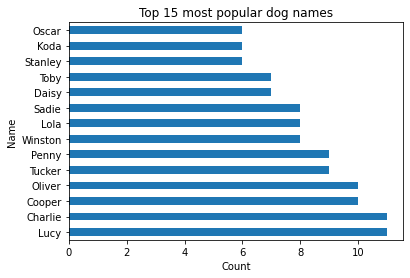

In [173]:
top_ten_names.plot(kind = 'barh')
plt.title('Top 15 most popular dog names')
plt.xlabel('Count')
plt.ylabel('Name')

So here we can see that Lucy and Charlie, somewhat disappointingly, are tied the top name. All of these are pretty boring dog names. Despite some of the totally wacky names I saw in the unique names list earlier (like "Flumkin" or something, and some great pun names like Chompsky) I think we can conclude that the most popular names are drab human names, along with a couple of stereotypical dog names (Scout, Rusty). I'm surprised there are no Tyrians and GoT character names. I seem to recall Arya being the most popular cat name during the last few years of GoT. 

## Viz Question 2: How has the user engagement changed over time?

I've followed this account literally for years, I think more or less since he started it (also recommended: @IvePetThatDog) so I'm curious to see how his engagement has changed over time. First I just took a look at his overall retweet count (that's people retweeting him, not him retweeting others), and then at his yearly retweet count alongside his new follower count per year. 

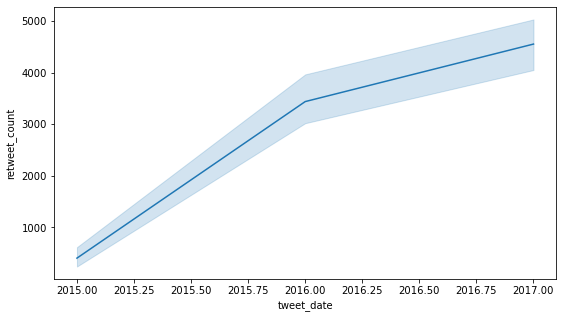

In [175]:
plt.figure(figsize = (9,5))
ax = sns.lineplot(x= ultimate_dogs_master['tweet_date'].dt.year, y=ultimate_dogs_master['retweet_count'], data=ultimate_dogs_master)

This shows a really sharp spike for the first year of the account and then a slight slowing after 2016, at which point his presence was probably less novel and everyone knew about him, and everyone knew that everyone else knew about him.

In [176]:
yearly_rt_count = ultimate_dogs_master.groupby([ultimate_dogs_master['tweet_date'].dt.year])['retweet_count'].sum()
yearly_fav_count = ultimate_dogs_master.groupby([ultimate_dogs_master['tweet_date'].dt.year])['favorite_count'].sum()

In [177]:
yearly_rt_count

tweet_date
2015      67664.0
2016    1134481.0
2017    1797953.0
Name: retweet_count, dtype: float64

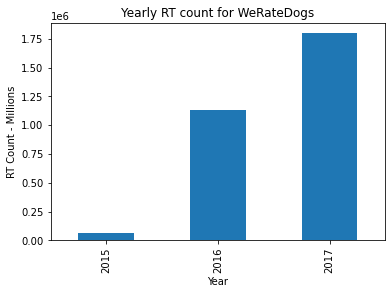

In [178]:
yearly_rt_count.plot(kind = 'bar')
plt.title('Yearly RT count for WeRateDogs')
plt.ylabel('RT Count - Millions')
plt.xlabel('Year');

So we can see his first year he only received around 70,000 RTs (the y axis is in millions) but then an absolutely bonkers jump in the following year, and then again a significant (but slightly less significant) increase between 2016 and 2017. 

In [179]:
yearly_fav_count

tweet_date
2015     163870.0
2016    3586581.0
2017    7744883.0
Name: favorite_count, dtype: float64

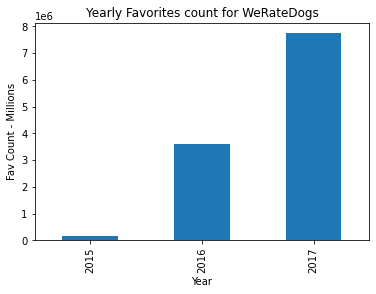

In [183]:
yearly_fav_count.plot(kind = 'bar')
plt.title('Yearly Favorites count for WeRateDogs')
plt.ylabel('Fav Count - Millions')
plt.xlabel('Year');

Here we can see a fairly similar pattern with number of favorites, except the jumps are more significant. But we can see a bigger jump in fav counts than we see in RT counts, which indicates that people were liking the post but not necessarily RTing it.